# Фадеев А.А., ИУ5-21М, Лаб№1

In [18]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

In [19]:
data = pd.read_csv('./books.csv', sep=',', encoding="utf-8")
#data.head(1)
data = data.reset_index(drop=True)
enc = OrdinalEncoder(categories='auto', dtype=int)
data[["BookID"]] = enc.fit_transform(data[["BookID"]])
data["Authors"] = data["Authors"].str.split('/',expand=True)[[0]]
data.rename(columns={"Authors":"Author"}, inplace=True)
date_data = data["Publication_date"].str.split('/',expand=True)
date_data.columns = ["Publication_month", "Publication_day", "Publication_year"]
date_data = date_data[["Publication_month", "Publication_year"]]
date_data.head(1)
data["Publication_month"] = date_data["Publication_month"]
data["Publication_month"] = pd.to_numeric(data["Publication_month"])
data["Publication_year"] = date_data["Publication_year"]
data["Publication_year"] = pd.to_numeric(data["Publication_year"])
data = data.drop(columns="ISBN")
data = data.drop(columns="ISBN13")
data = data.drop(columns="Publication_date")

In [20]:
agg_data = data.groupby("Title").BookID.count().sort_values(ascending=False).reset_index()
agg_data.columns = ["title", "Title_Freq"]
data = pd.merge(data, agg_data, left_on="Title", right_on="title").drop(columns="title")
agg_data = data.groupby("Author").BookID.count().sort_values(ascending=False).reset_index()
agg_data.columns = ["author", "Author_Freq"]
data = pd.merge(data, agg_data, left_on="Author", right_on="author").drop(columns="author")
agg_data = data.groupby("Language_code").BookID.count().sort_values(ascending=False).reset_index()
agg_data.columns = ["language_code", "Language_code_Freq"]
data = pd.merge(data, agg_data, left_on="Language_code", right_on="language_code").drop(columns="language_code")
agg_data = data.groupby("Publisher").BookID.count().sort_values(ascending=False).reset_index()
agg_data.columns = ["publisher", "Publisher_Freq"]
data = pd.merge(data, agg_data, left_on="Publisher", right_on="publisher").drop(columns="publisher")
data = data.sort_values(by=["BookID"]).reset_index().drop(columns="index")
#data.head(10)
data["Publication_monthName"] = pd.to_datetime(data["Publication_month"], format='%m').dt.month_name().str.slice(stop=3)

In [21]:
# График по годам (и пара к нему по месяцам 2020-го года), где по Y (кол-во отзывов/кол-во обзоров/оценка)
#    (мб из 6 графиков выбрать самые интересные)
# Доля известных авторов/известных названий в больших рейтингах за последние годы
# До/После (как со школьниками и наукой) с выходом какой-нибудь книги (Гарри Поттер, Ведьмак, Хоббит)
#    и влияние на книги этого жанра
# оценки по Х, кол-во отзывов по У, в точках - жанры
#    (как тут: https://github.com/empathy87/storytelling-with-data/blob/master/scatterplot/figure-5-6.ipynb)
# 

In [22]:
data.head(1)

,BookID,Title,Author,Average_rating,Language_code,Num_pages,Ratings_count,Text_reviews_count,Publisher,Publication_month,Publication_year,Title_Freq,Author_Freq,Language_code_Freq,Publisher_Freq,Publication_monthName
0,0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,Scholastic Inc.,9,2006,2,24,8908,13,Sep


In [23]:
# define colors
GRAY1 = '#231F20'
BLUE1 = '#174A7E'
RED1 = '#C3514E'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [24]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [25]:
Xm = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Xy = [i for i in range(1991, 2021)]
Ym = list(data['Ratings_count'].groupby(data['Publication_month']).sum())
Yy = list(data['Ratings_count'].groupby(data['Publication_year']).sum()[-30::])

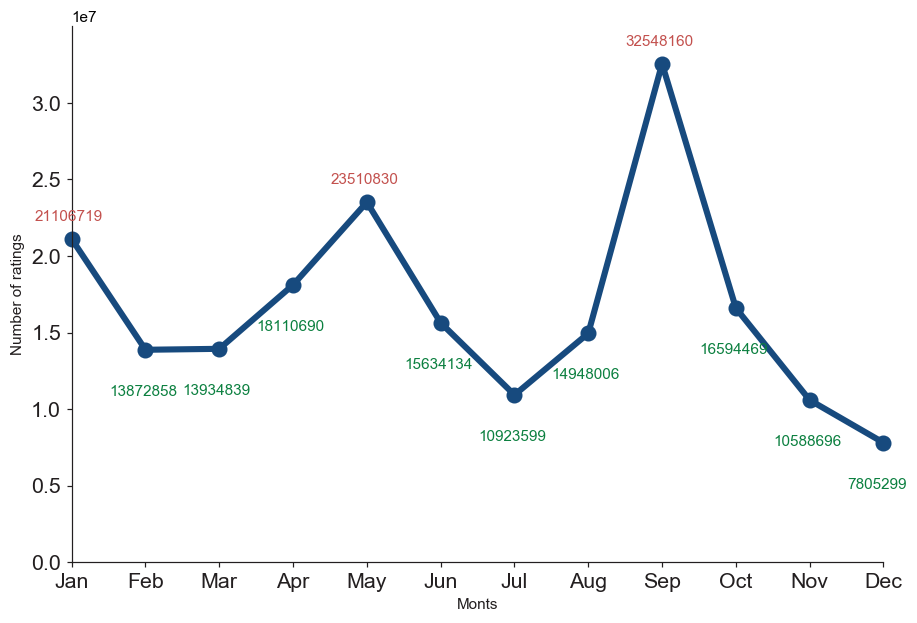

In [26]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.1, right=1, top=1, bottom=0.2)

# draw processed tickets line with markers
ax1.plot(range(12), Ym, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-12:], Ym[-12:], s=90, color=BLUE1, clip_on=False)

# annotate proccessed
for i, v in enumerate(Ym[-12:]):
    if i%4==0:
        ax1.annotate(str(v),
            (i, v),                   # (x,y) point to annotate
            xytext=(-24, +12),          # (x,y) to place the text at
            textcoords='offset points', # offset (in points)
            color=RED1,
            fontsize=10)
    else:
        ax1.annotate(str(v),
            (i, v),                   # (x,y) point to annotate
            xytext=(-24, -30),          # (x,y) to place the text at
            textcoords='offset points', # offset (in points)
            color=GREEN1,
            fontsize=10)

# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 35000000])

# set properties for axes object
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=Xm,
         yticks=list(range(0, 35000000, 5000000)))

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY1)

# change ticks and spines colors
ax1.tick_params(color=GRAY1)
ax1.spines['bottom'].set_color(GRAY1)
ax1.spines['left'].set_color(GRAY1)

# remove chart border
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# title the axis
ax1.set_xlabel("Monts").set_color(GRAY1)
ax1.set_ylabel("Number of ratings").set_color(GRAY1)